In [121]:
import os
os.getcwd()
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

survey = pd.read_excel("survey.xlsx")
survey=survey[survey['included']==1]

In [122]:
columns_to_check_time = [
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']

# Calculate Z-score for the selected columns
z_scores_time = np.abs(stats.zscore(survey[columns_to_check_time]))

# Define a threshold for outliers (e.g., z-score > 3)
threshold = 3

# Create a mask to filter out rows with outliers in any of the selected columns
outlier_mask_time = (z_scores_time > threshold).any(axis=1)

# Filter out rows with outliers
df_cleaned = survey[~outlier_mask_time]
df_cleaned = df_cleaned.reset_index(drop=True)

# Initialize the 'outliers' column to 0
survey['outliers'] = 0

# Update the 'outliers' column in the original DataFrame based on the filtered DataFrame's outlier_mask
survey.loc[survey.index, 'outliers'] = np.where(outlier_mask_time, 1, 0)

# print the number of outliers detected
num_outliers = outlier_mask_time.sum()
print(f'Number of outliers detected: {num_outliers}')

# Display the DataFrame to verify
print(survey.head())

Number of outliers detected: 76
   included   IDkoda  not equal            t_insert              t_edit  \
5         1  487grfa          0 2024-05-29 10:13:01 2024-05-29 10:21:04   
6         1  731gkam          0 2024-05-29 10:13:02 2024-05-29 10:20:05   
7         1   705fml          0 2024-05-29 10:13:03 2024-05-29 10:22:24   
8         1  67bemf5          0 2024-05-29 10:13:04 2024-05-29 10:22:02   
9         1  001mgan          1 2024-05-29 10:13:05 2024-05-29 10:23:43   

   status  SEX  AGE   Q2   Q3  ...  FB actual  whatsApp actual  \
5       6    2   23  0.0  0.0  ...         23                0   
6       6    2   22  0.0  0.0  ...          0                0   
7       6    2   22  0.0  0.0  ...         21                0   
8       6    1   22  0.0  0.0  ...         57                0   
9       6    2   22  0.0  0.0  ...         26                4   

   LinkedIn actual  Twitter actual  Youtube actual  Snapchat actual  \
5                0               0               

In [123]:
df_cleaned_time = survey #before outliers out 
# Display the summary of the data
print(df_cleaned_time.describe())


       included   not equal                       t_insert  \
count     448.0  448.000000                            448   
mean        1.0    0.437500  2024-05-30 22:11:29.698660864   
min         1.0    0.000000            2024-05-29 10:13:01   
25%         1.0    0.000000            2024-05-29 17:38:10   
50%         1.0    0.000000     2024-05-30 12:20:24.500000   
75%         1.0    1.000000            2024-05-30 17:26:41   
max         1.0    1.000000            2024-06-14 09:44:48   
std         0.0    0.496633                            NaN   

                              t_edit  status         SEX         AGE  \
count                            448   448.0  448.000000  448.000000   
mean   2024-05-31 00:20:03.939732224     6.0    1.618304   21.558036   
min              2024-05-29 10:19:21     6.0    1.000000   20.000000   
25%              2024-05-29 17:46:25     6.0    1.000000   21.000000   
50%              2024-05-30 17:31:20     6.0    2.000000   21.000000   
75%    20

In [52]:
def descriptive_statistics(df, start_col, end_col):
   
    # Select specified columns
    selected_columns = df.iloc[:, start_col:end_col]
    
    # Calculate descriptive statistics
    n_values = selected_columns.count()
    mean_values = selected_columns.mean()
    std_error_values = selected_columns.sem()
    median_values = selected_columns.median()
    std_dev_values = selected_columns.std()
    variance_values = selected_columns.var()
    min_values = selected_columns.min()
    max_values = selected_columns.max()
    
    # Combine all statistics into a DataFrame for better readability
    stats_df = pd.DataFrame({
        'N': round(n_values,2),
        'Mean': round(mean_values,2),
        'Std. Error': round(std_error_values,2),
        'Median': round(median_values,2),
        'Std. Deviation': round(std_dev_values,2),
        'Variance': round(variance_values,2),
        'Minimum': round(min_values,2),
        'Maximum': round(max_values,2)
    })
    
    return stats_df

# Get descriptive statistics for columns 6 to 18
stats_df = descriptive_statistics(df_cleaned_time, 6, 18)

# Output the results
print(stats_df)
#stats_df.to_excel('stats_df.xlsx')

        N   Mean  Std. Error  Median  Std. Deviation  Variance  Minimum  \
SEX   448   1.62        0.02     2.0            0.49      0.24      1.0   
AGE   448  21.56        0.05    21.0            1.16      1.33     20.0   
Q2    448   0.16        0.02     0.0            0.37      0.14      0.0   
Q3    448   0.12        0.02     0.0            0.33      0.11      0.0   
Q4    448   0.80        0.02     1.0            0.40      0.16      0.0   
Q5    448   0.65        0.02     1.0            0.48      0.23      0.0   
Q9_2  219   0.74        0.03     1.0            0.44      0.19      0.0   
Q6    229   0.41        0.03     0.0            0.49      0.24      0.0   
Q8    219   0.79        0.03     1.0            0.41      0.17      0.0   
Q9    229   0.21        0.03     0.0            0.41      0.17      0.0   
Q7a   219   0.29        0.03     0.0            0.46      0.21      0.0   
Q7b   229   0.76        0.03     1.0            0.43      0.18      0.0   

      Maximum  
SEX     

In [53]:
# Define the lottery columns and include GENDER
lotteries_columns = list(df_cleaned_time.columns[8:18])
lotteries_columns.append('SEX')

# Filter the DataFrame to include only the relevant columns ( now already in binary form)
risk_taking_data_binary = df_cleaned_time[lotteries_columns]

# Prepare results list
results_list = []

# Loop through each lottery column (excluding GENDER)
for column in lotteries_columns[:-1]:
    # Separate data by gender and also analyze combined data
    for gender in [1, 2, 'all']:  # 1 is male, 2 is female, 'all' is combined
        if gender == 'all':
            gender_data = risk_taking_data_binary
            gender_label = 'Total'
        else:
            gender_data = risk_taking_data_binary[risk_taking_data_binary['SEX'] == gender]
            gender_label = 'Male' if gender == 1 else 'Female'
        
        # Count decisions for each option
        counts = gender_data[column].value_counts().sort_index()
        
        # Ensure both counts have safe and risky categories
        counts = counts.reindex([0, 1], fill_value=0)
        
        # Store results
        results_list.append({
            'Lottery': column,
            'Gender': gender_label,
            'Safe (Count)': counts.get(0, 0),
            'Risky (Count)': counts.get(1, 0),
            'Total Count': counts.sum()
        })

# Convert results list to DataFrame
results_df = pd.DataFrame(results_list)

# Display results table
print(results_df)
results_df.to_excel('table_lotteries.xlsx', index=False)


   Lottery  Gender  Safe (Count)  Risky (Count)  Total Count
0       Q2    Male           134             37          171
1       Q2  Female           242             35          277
2       Q2   Total           376             72          448
3       Q3    Male           147             24          171
4       Q3  Female           245             32          277
5       Q3   Total           392             56          448
6       Q4    Male            25            146          171
7       Q4  Female            64            213          277
8       Q4   Total            89            359          448
9       Q5    Male            47            124          171
10      Q5  Female           109            168          277
11      Q5   Total           156            292          448
12    Q9_2    Male            24             62           86
13    Q9_2  Female            32            101          133
14    Q9_2   Total            56            163          219
15      Q6    Male      

In [211]:
# Initializing lists to store results
test_names = []
variables = []
test_statistics = []
p_values = []

# Chi-square test for each lottery column
for column in lotteries_columns[:-1]:
    contingency_table = pd.crosstab(risk_taking_data_binary['SEX'], risk_taking_data_binary[column])
    chi2, p_chi2, _, _ = stats.chi2_contingency(contingency_table)
    test_names.append('Chi-square')
    variables.append(column)
    test_statistics.append(chi2)
    p_values.append(p_chi2)
    # Independent t-test for each social media time column
for column in sm_columns:
    male_social_media = survey[survey['SEX'] == 1][column]
    female_social_media = survey[survey['SEX'] == 2][column]
    t_social_media, p_social_media = stats.ttest_ind(male_social_media, female_social_media)
    test_names.append('Independent t-test')
    variables.append(column)
    test_statistics.append(t_social_media)
    p_values.append(p_social_media)
    # Creating a summary table
results_table = pd.DataFrame({
    'Test': test_names,
    'Variable': variables,
    'Test Statistic': test_statistics,
    'p-value': p_values
})

# Printing the results table
print(results_table)
#results_table.to_excel('table_tests.xlsx', index=False)

                  Test                                    Variable  \
0           Chi-square                                          Q2   
1           Chi-square                                          Q3   
2           Chi-square                                          Q4   
3           Chi-square                                          Q5   
4           Chi-square                                        Q9_2   
5           Chi-square                                          Q6   
6           Chi-square                                          Q8   
7           Chi-square                                          Q9   
8           Chi-square                                         Q7a   
9           Chi-square                                         Q7b   
10  Independent t-test      Perception of time on all social media   
11  Independent t-test                          Other social media   
12  Independent t-test                        Instagram perception   
13  Independent t-te

In [54]:
names = ['Problem 3', 'Problem 4', 'Problem 7', 'Problem 8', 'Loss domain', 'Gain domain','Gain domain','Loss domain','Gain domain','Loss domain'] 

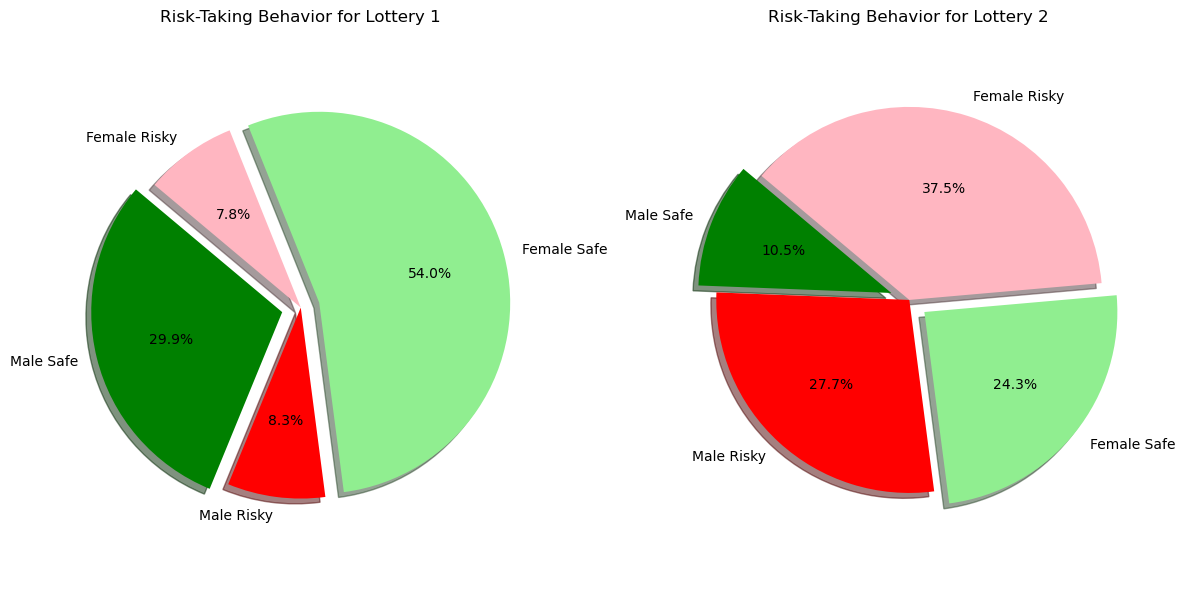

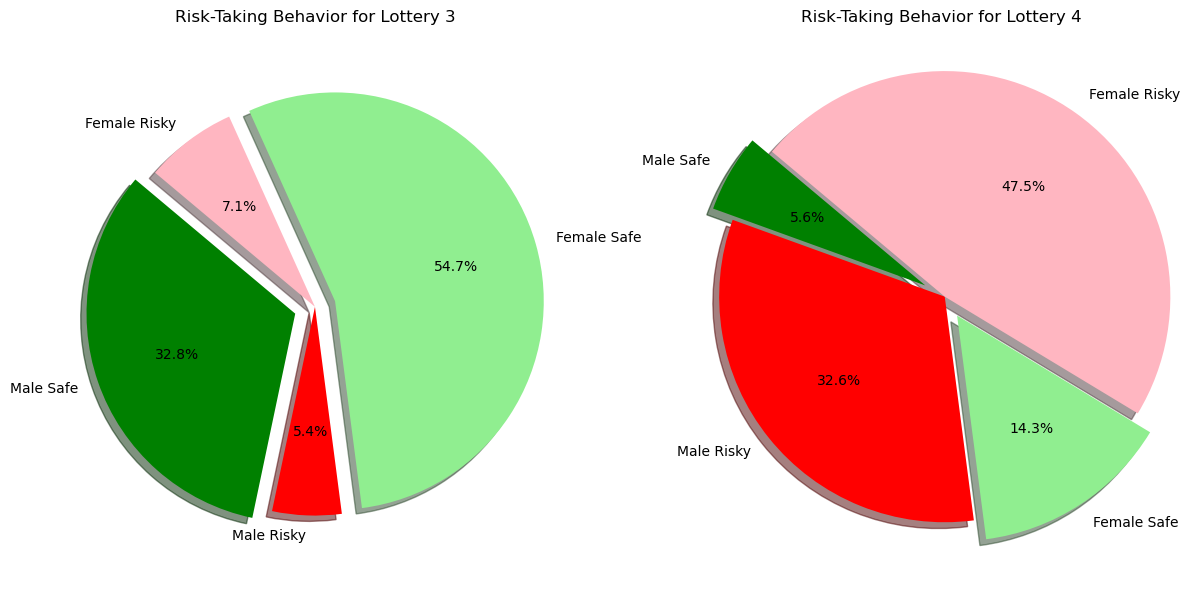

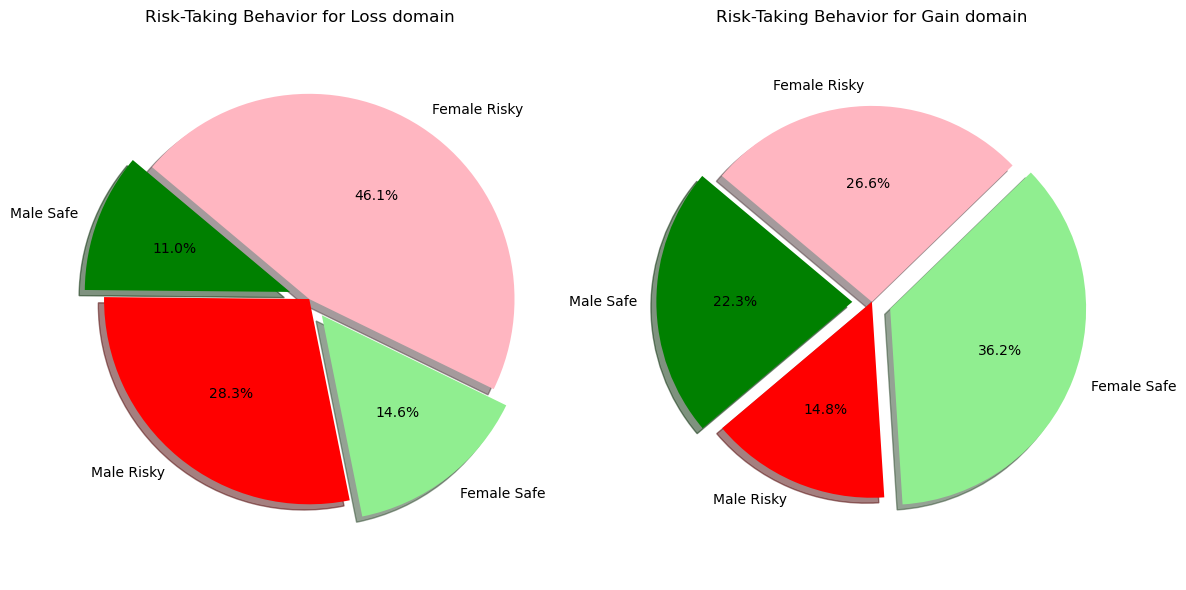

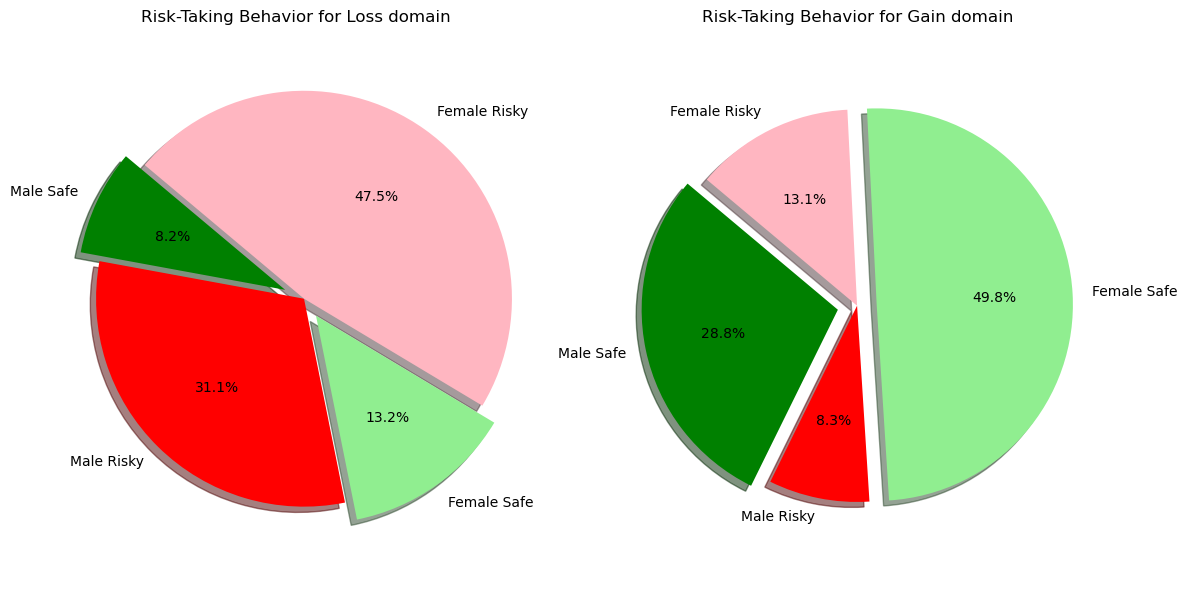

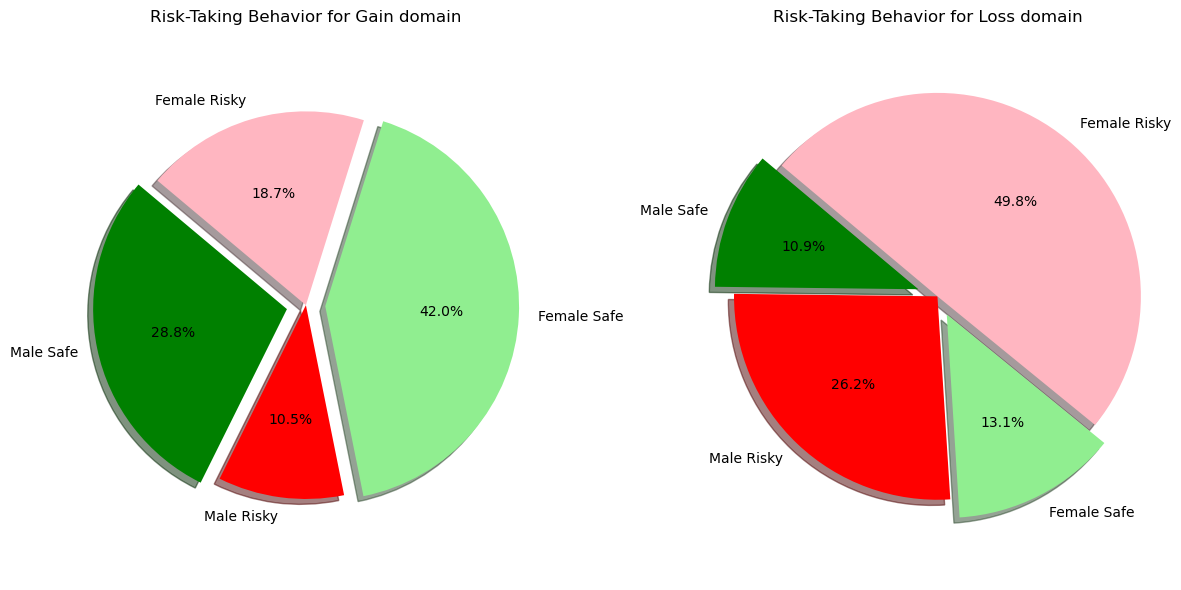

In [213]:
# Define pairs for plotting
pairs = [('Q2', 'Q5'), ('Q3', 'Q4'), ('Q9_2', 'Q6'), ('Q8', 'Q9'), ('Q7a', 'Q7b')]

# Define descriptive names for each column
column_to_name = {
    'Q2': 'Lottery 1',
    'Q5': 'Lottery 2',
    'Q3': 'Lottery 3',
    'Q4': 'Lottery 4',
    'Q9_2': 'Loss domain',
    'Q6': 'Gain domain',
    'Q8': 'Loss domain',
    'Q9': 'Gain domain',
    'Q7a': 'Gain domain',
    'Q7b': 'Loss domain'
}


# Loop through each pair of lottery columns and create pie charts
for pair in pairs:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create a subplot with 1 row and 2 columns
    for i, column in enumerate(pair):
# Prepare the data for the pie chart
        pie_data = {
        'Male Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Male Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 1) & (risk_taking_data_binary[column] == 1)].shape[0],
        'Female Safe': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 0)].shape[0],
        'Female Risky': risk_taking_data_binary[(risk_taking_data_binary['SEX'] == 2) & (risk_taking_data_binary[column] == 1)].shape[0]
    }

        # Create the pie chart
        labels = pie_data.keys()
        sizes = pie_data.values()
        colors = ['green', 'red', 'lightgreen', 'lightpink']
        explode = (0.1, 0, 0.1, 0)  # explode Male Safe and Female Safe for better visualization

        # Get the descriptive name for the current column
        descriptive_name = column_to_name[column]

        axes[i].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                    shadow=True, startangle=140)
        axes[i].set_title(f'Risk-Taking Behavior for {descriptive_name}')
        axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.tight_layout()
    plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
from scipy.stats import chi2_contingency
# Define the pairs and their respective domains
pairs = {
    ('Q9_2', 'Q6'): ('loss', 'gain'),
    ('Q8', 'Q9'): ('loss', 'gain'),
    ('Q7a', 'Q7b'): ('loss', 'gain')
}


results = {}
# Function to perform chi-squared test and return the result
def chi_squared_test(counts1, counts2):
    # Create contingency table
    contingency_table = pd.DataFrame([counts1, counts2], columns=['safe', 'risky'])
    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p, dof, expected

# Separate and aggregate responses for each pair
for (col1, col2), (domain1, domain2) in pairs.items():
    df_loss = risk_taking_data_binary[col1].dropna().value_counts().sort_index()
    df_gain = risk_taking_data_binary[col2].dropna().value_counts().sort_index()
    
    # Ensure both counts have safe and risky categories
    df_loss = df_loss.reindex([0, 1], fill_value=0)
    df_gain = df_gain.reindex([0, 1], fill_value=0)
    
    counts_loss = df_loss.values
    counts_gain = df_gain.values
    
    if counts_loss.sum() > 0 and counts_gain.sum() > 0:
        chi2, p, dof, expected = chi_squared_test(counts_loss, counts_gain)
        results[(col1, col2)] = {
            'chi2': chi2,
            'p-value': p,
            'degrees_of_freedom': dof,
            'expected_frequencies': expected
        }
    else:
        results[(col1, col2)] = 'Not enough data for chi-squared test'

# Print results
for pair, result in results.items():
    print(f"Pair: {pair}, Result: {result}")

Pair: ('Q9_2', 'Q6'), Result: {'chi2': 48.40539147946194, 'p-value': 3.466139240178538e-12, 'degrees_of_freedom': 1, 'expected_frequencies': array([[ 92.87946429, 126.12053571],
       [ 97.12053571, 131.87946429]])}
Pair: ('Q8', 'Q9'), Result: {'chi2': 143.9546361015706, 'p-value': 3.635038197978413e-33, 'degrees_of_freedom': 1, 'expected_frequencies': array([[110.96651786, 108.03348214],
       [116.03348214, 112.96651786]])}
Pair: ('Q7a', 'Q7b'), Result: {'chi2': 96.41642146599622, 'p-value': 9.30918187189442e-23, 'degrees_of_freedom': 1, 'expected_frequencies': array([[102.65625, 116.34375],
       [107.34375, 121.65625]])}


In [41]:
# Analyze social media usage

sm_columns = ['Perception of time on all social media',
       'Other social media', 'Instagram perception', 'TikTok perception',
       'FB perception', 'whatsApp perception', 'LinkedIn perception',
       'Twitter perception', 'Youtube perception', 'Snapchat perception',
       'Threads perception', 'Pinterest perception', 'other perception',
       'time spend on all social media apps actual', 'Instagram actual',
       'TikTok actual', 'FB actual', 'whatsApp actual', 'LinkedIn actual',
       'Twitter actual', 'Youtube actual', 'Snapchat actual', 'Threads actual',
       'Pinterest actual', 'other actual']
sm_data = df_cleaned_time[sm_columns]
# Export the DataFrame to an Excel file
#sm_data.to_excel('sm_data.xlsx', index=False)

In [42]:
# Replace 0 values with NaN, so the values 0 are not taken into the account when calculating the means
sm_data.replace(0, np.nan, inplace=True)

# Calculate statistics ignoring NaN
statistics = sm_data.describe()

# Create new columns for the differences
sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']

social_media = ["Instagram", "TikTok", "FB", "whatsApp", "LinkedIn", "Twitter", "Youtube", "Snapchat", "Threads", "Pinterest", "other"]
for media in social_media:
    perception_col = f"{media} perception"
    actual_col = f"{media} actual"
    if perception_col in sm_data.columns and actual_col in sm_data.columns:
        difference_col = f"difference_{media}"
        sm_data[difference_col] = sm_data[perception_col] - sm_data[actual_col]

# Display the statistics
print("\nStatistics (ignoring NaN):")
print(statistics)
print((sm_data['Perception of time on all social media']).describe())
print((sm_data['time spend on all social media apps actual']).describe())

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_94321/1152921165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data.replace(0, np.nan, inplace=True)



Statistics (ignoring NaN):
       Perception of time on all social media  Other social media  \
count                              448.000000          104.000000   
mean                               258.348214           23.201923   
std                                 80.022056           15.076105   
min                                 60.000000            1.000000   
25%                                180.000000           10.000000   
50%                                240.000000           21.000000   
75%                                300.000000           32.500000   
max                                420.000000           56.000000   

       Instagram perception  TikTok perception  FB perception  \
count            416.000000         264.000000     275.000000   
mean              97.911058          99.965909      34.854545   
std              107.812462         123.128248      46.213807   
min                4.000000           2.000000       1.000000   
25%               60.0000

/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_94321/1152921165.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data['difference_all_social_media'] = sm_data['Perception of time on all social media'] - sm_data['time spend on all social media apps actual']
/var/folders/jh/x3pzkf253nz6__d6tfg4p4200000gn/T/ipykernel_94321/1152921165.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_data[difference_col] = sm_data[perception_col] - sm_data[actual_col]
/var/folders/jh/x3pzkf253nz6__d6tfg4

In [47]:
#data2 = sm_data[['Perception of time on all social media','time spend on all social media apps actual']]
#statistics_table= data2.describe()

#excel_file = 'statistics_table.xlsx'
#statistics_table.to_excel(excel_file, index=True)

# Get descriptive statistics for columns 
stats_df_sm = descriptive_statistics(sm_data, 13, 25)

# Output the results
print(stats_df_sm)
#stats_df_sm.to_excel('stats_df_sm.xlsx')

                                              N    Mean  Std. Error  Median  \
time spend on all social media apps actual  448  270.26        5.04   255.0   
Instagram actual                            431  101.62        4.92    71.0   
TikTok actual                               270  116.90        6.88    80.0   
FB actual                                   314   32.02        2.06    20.0   
whatsApp actual                             151   25.59        3.61    10.0   
LinkedIn actual                              73   19.51        3.03     9.0   
Twitter actual                               82   48.93        8.63    20.5   
Youtube actual                              370   81.19        4.90    50.5   
Snapchat actual                             278   55.68        4.21    30.0   
Threads actual                               33   12.91        3.15     6.0   
Pinterest actual                            103   27.70        4.87    11.0   
other actual                                118   74

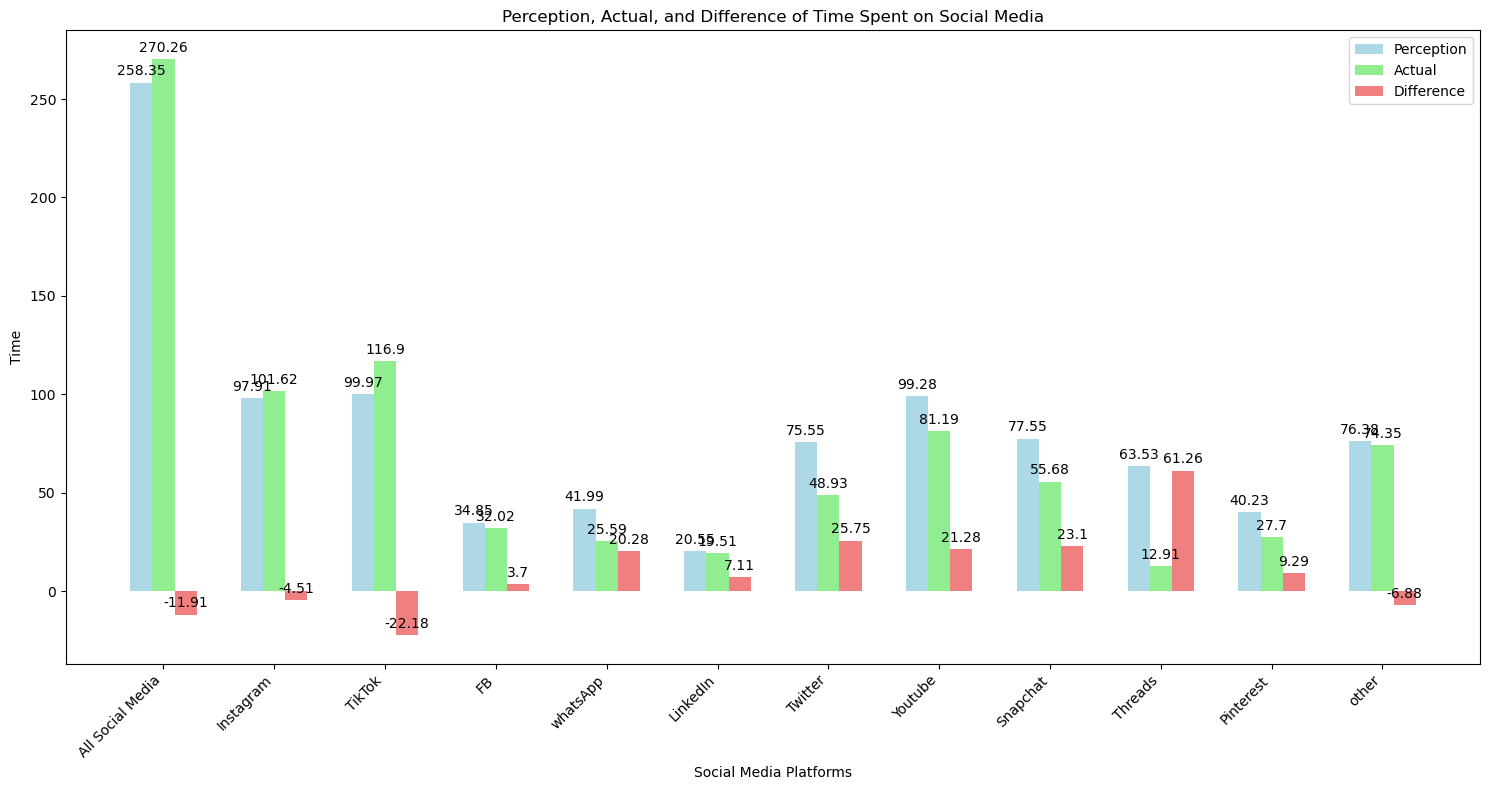

In [280]:
# Plotting


labels = ['All Social Media'] + social_media
perception_values = [sm_data['Perception of time on all social media'].mean()] + [sm_data[f"{media} perception"].mean() for media in social_media]
actual_values = [sm_data['time spend on all social media apps actual'].mean()] + [sm_data[f"{media} actual"].mean() for media in social_media]
difference_values = [sm_data['difference_all_social_media'].mean()] + [sm_data[f"difference_{media}"].mean() for media in social_media]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 8))
rects1 = ax.bar(x - width, perception_values, width, label='Perception', color='lightblue')
rects2 = ax.bar(x, actual_values, width, label='Actual', color='lightgreen')
rects3 = ax.bar(x + width, difference_values, width, label='Difference', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Social Media Platforms')
ax.set_ylabel('Time')
ax.set_title('Perception, Actual, and Difference of Time Spent on Social Media')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [58]:
correlation = sm_data[['Perception of time on all social media', 'time spend on all social media apps actual']].corr()
correlation

,Perception of time on all social media,time spend on all social media apps actual
Perception of time on all social media,1.000000,0.593307
time spend on all social media apps actual,0.593307,1.000000


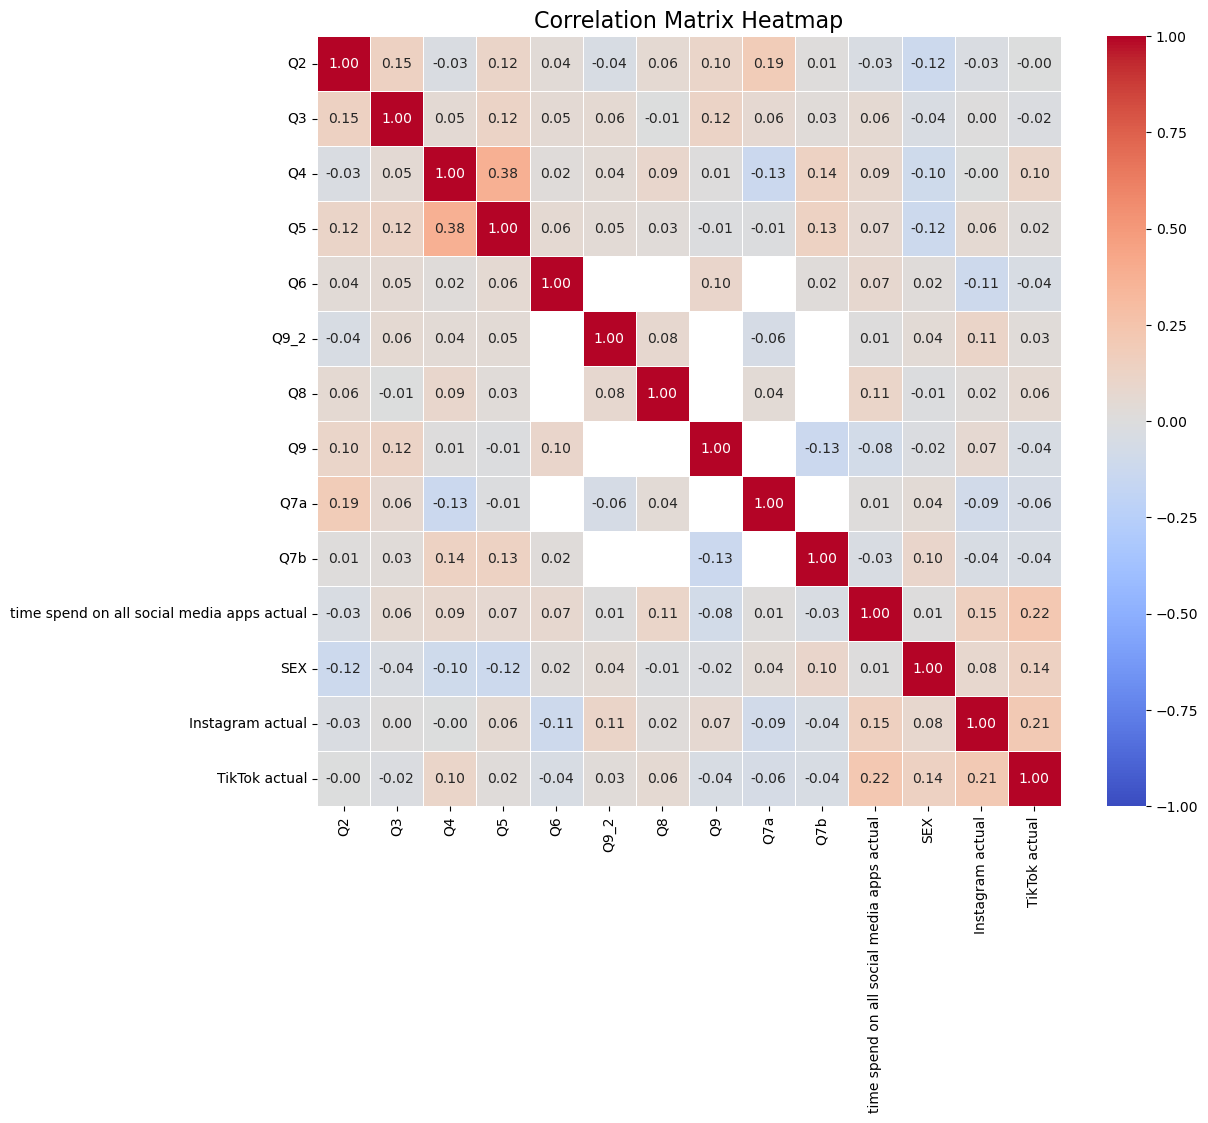

In [207]:

correlation = survey[['Q2','Q3','Q4','Q5','Q6','Q9_2','Q8','Q9','Q7a','Q7b' ,'time spend on all social media apps actual','SEX','Instagram actual','TikTok actual']].corr()
correlation

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set plot title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [144]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Logistic regression example for a binary risk-taking outcome
lotteries = ['Q2','Q3','Q4','Q5']
for column in lotteries:
    X = survey[['Instagram actual','TikTok actual','SEX','AGE']]
    y = survey[column]
    X = sm.add_constant(X)
    logit_model = sm.Logit(y, X).fit()
    print(logit_model.summary())
 

Optimization terminated successfully.
         Current function value: 0.425730
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     Q2   No. Observations:                  448
Model:                          Logit   Df Residuals:                      443
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Aug 2024   Pseudo R-squ.:                 0.03430
Time:                        17:57:34   Log-Likelihood:                -190.73
converged:                       True   LL-Null:                       -197.50
Covariance Type:            nonrobust   LLR p-value:                  0.008880
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.1669      2.664      2.315      0.021       0.945      11.389
Instagram a

In [64]:
from scipy.stats import ttest_ind, pearsonr
lotteries = ['Q2','Q3','Q4','Q5']
# Correlation analysis for all social media and lotteries
print("\nCorrelation between Social Media Usage and Risk-taking tasks")
for col in lotteries:
    corr, _ = pearsonr(survey['time spend on all social media apps actual'].dropna(), survey[col].dropna())
    print(f"Correlation between avg_actual and {col}: {corr}")




Correlation between Social Media Usage and Risk-taking tasks
Correlation between avg_actual and Q2: -0.034922775681184653
Correlation between avg_actual and Q3: 0.05776401562116567
Correlation between avg_actual and Q4: 0.08589736587743559
Correlation between avg_actual and Q5: 0.0687030391829841

T-test for differences in Risk-taking tasks between High and Low Social Media Usage:
T-test for Q2: t-stat=-1.763027915505087, p-value=0.07859515142568396
T-test for Q3: t-stat=0.3207010274562008, p-value=0.7485874604992165
T-test for Q4: t-stat=2.4524533463551395, p-value=0.014581529602111712
T-test for Q5: t-stat=1.9184585197357626, p-value=0.05569251423706025
T-test for Q6: t-stat=0.4561977561788964, p-value=0.6486840930360782
T-test for Q9_2: t-stat=0.5778799625680824, p-value=0.5639450522924949
T-test for Q8: t-stat=1.4472346532109401, p-value=0.14929797394254382
T-test for Q9: t-stat=-1.4165606590078763, p-value=0.15800298543698524
T-test for Q7a: t-stat=0.04322259749443226, p-value=0.

In [186]:
# transforming risk taking outcomes into just one variable for lotteries, to see if we find some siginifcant resutls
# Create a risk-taking variable
def classify_risk_taking(row):
    num_risky = sum(row[col] == 1 for col in lotteries)
    num_safe = sum(row[col] == 0 for col in lotteries)
    if num_risky > num_safe:
        return 1  # Risk-taking
    elif num_safe > num_risky:
        return 2   # Risk-averse
    else:
        return 0   # Neutral

survey['risk_taking'] = survey.apply(classify_risk_taking, axis=1)

# Risk-taking framing effect from scenarios 
scenarios_columns = [ 'Q8', 'Q9', 'Q7a', 'Q7b']
def classify_framing(row):
    num_risky = sum(row[col] == 1 for col in scenarios_columns)
    num_safe = sum(row[col] == 0 for col in scenarios_columns)
    if num_risky == 2:
        return 0  
    elif num_safe == 2:
        return 0   
    else:
        return 1   
    
    
survey['framing'] = survey.apply(classify_framing, axis=1)

In [206]:
from scipy.stats import chi2_contingency
# Calculate the median usage, ignoring NaN values
median_usage = survey['time spend on all social media apps actual'].median(skipna=True)

# Create the new column `social_media_group` based on the median value
survey['social_media_group'] = np.where(
    survey['time spend on all social media apps actual'] > median_usage,
    'high',
    'low'
)
# Create contingency table for risk-taking and social media usage
contingency_table = pd.crosstab(survey['risk_taking'], survey['social_media_group'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")


Chi-square statistic: 8.639436324541952, p-value: 0.013303632479688823


In [131]:
# Create contingency table for framing risk-taking and social media usage
contingency_framing_table = pd.crosstab(survey['framing'], survey['social_media_group'])

# Perform Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_framing_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}")

Chi-square statistic: 2.2952299394608002, p-value: 0.12977199128333025


In [139]:
lotteries = ['Q2','Q3','Q4','Q5','Q6','Q9_2','Q8','Q9','Q7a','Q7b']
# Hypothesis testing for each of the risk-taking tasks 

print("\nChi-square test for differences in Risk-taking tasks between High and Low Social Media Usage:")
for col in lotteries:
    # Create contingency table
    contingency_table = pd.crosstab(survey[col], survey['social_media_group'])
    
    # Perform Chi-square test
    chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {col}: chi2-stat={chi2_stat}, p-value={p_val}")


Chi-square test for differences in Risk-taking tasks between High and Low Social Media Usage:
Chi-square test for Q2: chi2-stat=2.6601551779174795, p-value=0.10289069611736525
Chi-square test for Q3: chi2-stat=0.03188839063278525, p-value=0.858272833188166
Chi-square test for Q4: chi2-stat=5.3880677981981515, p-value=0.020274909280787613
Chi-square test for Q5: chi2-stat=3.294965688233087, p-value=0.06949255987314247
Chi-square test for Q6: chi2-stat=0.10490463046683984, p-value=0.7460214338844198
Chi-square test for Q9_2: chi2-stat=0.18069172044115028, p-value=0.6707794596641466
Chi-square test for Q8: chi2-stat=1.6420538758176744, p-value=0.20004390098150432
Chi-square test for Q9: chi2-stat=1.5740078738080538, p-value=0.20962592662145446
Chi-square test for Q7a: chi2-stat=0.0, p-value=1.0
Chi-square test for Q7b: chi2-stat=0.12008688837399462, p-value=0.7289402712055502


In [204]:
# Convert social media usage to a binary variable (high/low)
survey['social_media_binary'] = np.where(survey['social_media_group'] == 'high', 1, 0)
#correlation coefficent- with actual time since for binarya and categorical it does not make sense
corr, p_value = pointbiserialr(survey['time spend on all social media apps actual'], survey['risk_taking'])
print(f"Correlation coefficient: {corr}, p-value: {p_value}")
#correlation coefficent- with actual time since for binarya and categorical it does not make sense
corr, p_value = pointbiserialr(survey['social_media_group'], survey['risk_taking'])
print(f"Correlation coefficient: {corr}, p-value: {p_value}")

Correlation coefficient: 0.09412100489670092, p-value: 0.04647843566675169
Correlation coefficient: -0.13272634880902992, p-value: 0.004894475417722189


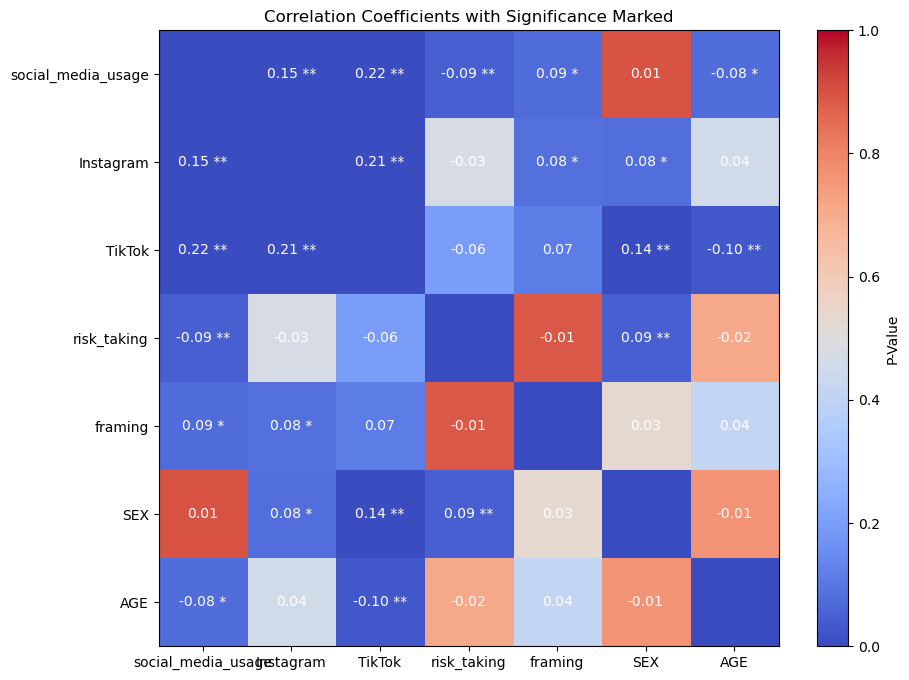

In [120]:
survey.rename(columns={'time spend on all social media apps actual': 'social_media_usage','Instagram actual':'Instagram','TikTok actual':'TikTok'}, inplace=True)
columns = ['social_media_usage','Instagram','TikTok' ,'risk_taking','framing','SEX','AGE']
n = len(columns)

# Create matrices to store correlation coefficients and p-values
correlation_matrix = np.zeros((n, n))
p_value_matrix = np.zeros((n, n))

# Calculate correlation coefficients and p-values
for i in range(n):
    for j in range(n):
        if i == j:
            correlation_matrix[i, j] = np.nan
            p_value_matrix2[i, j] = np.nan
        else:
            corr, p_value = pearsonr(survey[columns[i]], survey[columns[j]])
            correlation_matrix[i, j] = corr
            p_value_matrix[i, j] = p_value

# Create a combined DataFrame for plotting
combined_df = pd.DataFrame({
    'Correlation': correlation_matrix.flatten(),
    'P-Value': p_value_matrix.flatten(),
    'Row': np.repeat(range(n), n),
    'Col': np.tile(range(n), n)
})

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create a color map for p-values
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=0, vmax=1)

# Create the heatmap
heatmap = ax.imshow(p_value_matrix, cmap=cmap, norm=norm, aspect='auto')

# Annotate with correlation coefficients and significance stars
for i in range(n):
    for j in range(n):
        if not np.isnan(correlation_matrix2[i, j]):
            value = correlation_matrix[i, j]
            p_value = p_value_matrix[i, j]
            annotation = f'{value:.2f}'
            if p_value < 0.05:
                annotation += ' **'
            elif p_value < 0.1:
                annotation += ' *'
            ax.text(j, i, annotation,
                    ha='center', va='center', color='white')


# Add color bar and labels
cbar = plt.colorbar(heatmap, ax=ax, orientation='vertical')
cbar.set_label('P-Value')

ax.set_xticks(range(n))
ax.set_yticks(range(n))
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
ax.set_title('Correlation Coefficients with Significance Marked')

plt.show()

In [192]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Prepare data for ordinal logistic regression
survey['social_media_group'] = survey['social_media_group'].astype('category').cat.codes
X = survey[['social_media_group', 'SEX', 'AGE']]
y = survey['risk_taking']

# Fit the ordinal logistic regression model
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.998912
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:            risk_taking   Log-Likelihood:                -447.51
Model:                   OrderedModel   AIC:                             905.0
Method:            Maximum Likelihood   BIC:                             925.5
Date:                Fri, 02 Aug 2024                                         
Time:                        11:03:01                                         
No. Observations:                 448                                         
Df Residuals:                     443                                         
Df Model:                           3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [208]:
# Prepare data for ordinal logistic regression
survey['social_media_group'] = survey['social_media_group'].astype('category').cat.codes
X = survey[['time spend on all social media apps actual', 'SEX', 'AGE']]
y = survey['risk_taking']

# Fit the ordinal logistic regression model
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 1.003647
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
                             OrderedModel Results                             
Dep. Variable:            risk_taking   Log-Likelihood:                -449.63
Model:                   OrderedModel   AIC:                             909.3
Method:            Maximum Likelihood   BIC:                             929.8
Date:                Fri, 02 Aug 2024                                         
Time:                        12:33:13                                         
No. Observations:                 448                                         
Df Residuals:                     443                                         
Df Model:                           3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
------

In [203]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Prepare data for ordinal logistic regression
# Create the new variable in one line
survey['Instagram_TikTok'] = (survey[['Instagram actual', 'TikTok actual']].sum(axis=1) > survey[['Instagram actual', 'TikTok actual']].sum(axis=1).median()).astype(int)

X = survey[['Instagram_TikTok', 'SEX', 'AGE']]
y = survey['risk_taking']

# Fit the ordinal logistic regression model
model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

# Display the summary
print(result.summary())



Optimization terminated successfully.
         Current function value: 1.006635
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
                             OrderedModel Results                             
Dep. Variable:            risk_taking   Log-Likelihood:                -450.97
Model:                   OrderedModel   AIC:                             911.9
Method:            Maximum Likelihood   BIC:                             932.5
Date:                Fri, 02 Aug 2024                                         
Time:                        11:44:12                                         
No. Observations:                 448                                         
Df Residuals:                     443                                         
Df Model:                           3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

In [188]:
# Prepare data
survey['social_media_group'] = survey['social_media_group'].astype('category').cat.codes
X = survey[['social_media_group', 'SEX', 'AGE']]
y = survey['risk_taking']

# Add constant term for the intercept
X = sm.add_constant(X)

# Fit multinomial logistic regression model
mnlogit_model = sm.MNLogit(y, X).fit()
print(mnlogit_model.summary())

Optimization terminated successfully.
         Current function value: 0.984938
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:            risk_taking   No. Observations:                  448
Model:                        MNLogit   Df Residuals:                      440
Method:                           MLE   Df Model:                            6
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.02666
Time:                        11:02:25   Log-Likelihood:                -441.25
converged:                       True   LL-Null:                       -453.34
Covariance Type:            nonrobust   LLR p-value:                 0.0004852
     risk_taking=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.6538      2.858      1.979      0.048       0.053      11.255
socia

In [189]:
import numpy as np
import statsmodels.api as sm

# Add a constant column to represent the null model
X_null = np.ones((len(y), 1))  # Just a constant term
X_null = sm.add_constant(X_null, has_constant='add')  # Ensure constant term is included

# Fit the null model
null_model = sm.OLS(y, X_null).fit()
log_likelihood_null = null_model.llf
print(f"Null Model Log-Likelihood: {log_likelihood_null}")


Null Model Log-Likelihood: -586.9743003733756


In [193]:
# Define and fit the full model
full_model = OrderedModel(y, X, distr='logit')
full_result = full_model.fit(method='bfgs')

# Print log-likelihood for the full model
log_likelihood_full = full_result.llf
print(f"Full Model Log-Likelihood: {log_likelihood_full}")


Optimization terminated successfully.
         Current function value: 0.998912
         Iterations: 26
         Function evaluations: 30
         Gradient evaluations: 30
Full Model Log-Likelihood: -447.5125648262808


In [194]:
from scipy.stats import chi2

# Calculate the likelihood ratio statistic
lr_statistic = -2 * (log_likelihood_null - log_likelihood_full)
df = len(X.columns)  # Degrees of freedom is the number of parameters in the full model

# Calculate p-value
p_value = chi2.sf(lr_statistic, df)

# Print the results
print(f"Likelihood Ratio Statistic: {lr_statistic}")
print(f"Degrees of Freedom: {df}")
print(f"P-value: {p_value}")


Likelihood Ratio Statistic: 278.9234710941896
Degrees of Freedom: 3
P-value: 3.6205050479248046e-60
